## ACCOUNTING ANALYTICS FINAL PROJECT SECTION 2
### TEAM MCM

In [1]:
# Run the library
import tweepy  
import csv
import pandas as pd

In [2]:
consumer_key = 'EgSk20pf4GEaEWFdhvgVatqh6'   ########### --Input your keys into the ' ' --
consumer_secret = 'KPsiCFw1uxdpP3FAxEuMyzQZ7kdjdt6QK9diyw5PcWwv5oZyNq'    ########### --Input your keys into the ' ' --
access_token = '1245350239910985734-C8rdg8VPDha4trQPpO1lwjpBavVf3S'  ########### --Input your keys into the ' ' --
access_token_secret = 'ITaodp6kBAGBDYvl0n4twFSeZsNsQ8I0WEPxcezVCX0iF'   ########### --Input your keys into the ' ' --

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
# initialize a list to hold all the tweepy Tweets
alltweets = []

# make initial request for most recent tweets (200 is the maximum allowed count)
new_tweets = api.user_timeline(screen_name ='GoldmanSachs', count=200)  ########### --Change the Screen Name-- 


# save most recent tweets
alltweets.extend(new_tweets)

# save the id of the oldest tweet less one
oldest = alltweets[-1].id - 1

# keep grabbing tweets until there are no tweets left to grab
while len(new_tweets) > 0:
    print
    "getting tweets before %s" % (oldest)

    # all subsiquent requests use the max_id param to prevent duplicates
    new_tweets = api.user_timeline(screen_name='GoldmanSachs', count=200, max_id=oldest) ########### --Change the Screen Name-- 

    # save most recent tweets
    alltweets.extend(new_tweets)

    # update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    print
    "...%s tweets downloaded so far" % (len(alltweets))

# transform the tweepy tweets into a 2D array that will populate the csv
outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8"), tweet.user.screen_name] for tweet in alltweets]

# write the csv
with open('%s_tweets.csv' % 'GoldmanSachs1', 'w', newline = '') as f: ########### --Change the Screen Name-- 
    writer = csv.writer(f)
    writer.writerow(["id", "created_at", "text", "screenname"])
    writer.writerows(outtweets)

TweepError: ignored

In [ ]:
tweet= tweet= pd.read_csv('D:\Fall 2020\Accounting Analytics\Final Project_GoldmanSachs\GoldmanSachs_tweets.csv')
tweet

,id,created_at,text,screenname
0,1328382403321192449,2020-11-16 17:00:19,"b""\xe2\x80\x9cOpening our own retail stores, d...",GoldmanSachs
1,1328367266484903940,2020-11-16 16:00:10,b'\xe2\x80\x9cA best-case scenario here would ...,GoldmanSachs
2,1328353033709903875,2020-11-16 15:03:37,"b""We're pleased to announce that $GS' Dina Pow...",GoldmanSachs
3,1328322008724230144,2020-11-16 13:00:20,b'.@ChipotleTweets Chairman and CEO Brian Nicc...,GoldmanSachs
4,1328282314003111942,2020-11-16 10:22:36,b'$GS Chief Asia Pacific strategist Tim Moe ex...,GoldmanSachs
...,...,...,...,...
3215,1105234526299717636,2019-03-11 22:30:19,b'Architect @DanielLibeskind tells $GS\' Stefa...,GoldmanSachs
3216,1105211419589558272,2019-03-11 20:58:30,b'RT @YahooFinance: @GoldmanSachs CEO David So...,GoldmanSachs
3217,1105185444457836546,2019-03-11 19:15:17,"b""$GS Research's Andrew Tilton on China's 'bum...",GoldmanSachs
3218,1105177998716792832,2019-03-11 18:45:42,"b""RT @dumav: Goldman Sachs is offering female ...",GoldmanSachs


In [ ]:
from datetime import datetime

tweet['created_at'] = pd.to_datetime(tweet['created_at'])
tweet['created_at'] = tweet['created_at'].dt.date
tweet['created_at'] = pd.to_datetime(tweet['created_at'])

tweet

,id,created_at,text,screenname
0,1328382403321192449,2020-11-16,"b""\xe2\x80\x9cOpening our own retail stores, d...",GoldmanSachs
1,1328367266484903940,2020-11-16,b'\xe2\x80\x9cA best-case scenario here would ...,GoldmanSachs
2,1328353033709903875,2020-11-16,"b""We're pleased to announce that $GS' Dina Pow...",GoldmanSachs
3,1328322008724230144,2020-11-16,b'.@ChipotleTweets Chairman and CEO Brian Nicc...,GoldmanSachs
4,1328282314003111942,2020-11-16,b'$GS Chief Asia Pacific strategist Tim Moe ex...,GoldmanSachs
...,...,...,...,...
3215,1105234526299717636,2019-03-11,b'Architect @DanielLibeskind tells $GS\' Stefa...,GoldmanSachs
3216,1105211419589558272,2019-03-11,b'RT @YahooFinance: @GoldmanSachs CEO David So...,GoldmanSachs
3217,1105185444457836546,2019-03-11,"b""$GS Research's Andrew Tilton on China's 'bum...",GoldmanSachs
3218,1105177998716792832,2019-03-11,"b""RT @dumav: Goldman Sachs is offering female ...",GoldmanSachs


In [ ]:
# filter date
f_tweet = tweet[tweet['created_at'] > '2019-01-01']
f_tweet = f_tweet[['created_at','text','screenname']]
f_tweet

,created_at,text,screenname
0,2020-11-16,"b""\xe2\x80\x9cOpening our own retail stores, d...",GoldmanSachs
1,2020-11-16,b'\xe2\x80\x9cA best-case scenario here would ...,GoldmanSachs
2,2020-11-16,"b""We're pleased to announce that $GS' Dina Pow...",GoldmanSachs
3,2020-11-16,b'.@ChipotleTweets Chairman and CEO Brian Nicc...,GoldmanSachs
4,2020-11-16,b'$GS Chief Asia Pacific strategist Tim Moe ex...,GoldmanSachs
...,...,...,...
3215,2019-03-11,b'Architect @DanielLibeskind tells $GS\' Stefa...,GoldmanSachs
3216,2019-03-11,b'RT @YahooFinance: @GoldmanSachs CEO David So...,GoldmanSachs
3217,2019-03-11,"b""$GS Research's Andrew Tilton on China's 'bum...",GoldmanSachs
3218,2019-03-11,"b""RT @dumav: Goldman Sachs is offering female ...",GoldmanSachs


In [ ]:
# Define Data Cleaning Function
import re # regular expressions, we will introduce them in the section 10
import string

def clean_text(text):
    # Make text lowercase if necessary, remove text in square brackets, remove punctuation
    #text = text.lower() # Covert to the lower case
    text = re.sub(r'http?:\/\/\S+', ' ', text) # Removing the hyper link
    text = re.sub('\[.*?\]', ' ',text) # Removing bracket
    text = re.sub('https', ' ',text) # Removing the 'https'
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) # Removing all the punctuations
    text = re.sub('\w*\d\w*', ' ', text) # Removing all the number
    text = re.sub('[''""...]',' ', text) # Removing all the quotation mark
    text = re.sub('\n', ' ', text) # Removing the new line switching
    text = re.sub('co', ' ', text) # Removing 'co'
    text = re.sub(r'RT[\s]+' , ' ', text) # Removing RT
    text = re.sub(' +', ' ', text) # Removing the additional spaces
    return text


In [ ]:
# Clean the whole twitter dataframe
for i in range(0, len(f_tweet)):
    text = f_tweet.iloc[i,1]    # 1 means the second column - text
    f_tweet.iloc[i,1] = clean_text(text)
f_tweet

,created_at,text,screenname
0,2020-11-16,b our own retail stores doing our own televisi...,GoldmanSachs
1,2020-11-16,b best case scenario here would involve emerge...,GoldmanSachs
2,2020-11-16,b We re pleased to announce that GS Dina Powel...,GoldmanSachs
3,2020-11-16,b ChipotleTweets Chairman and CEO Brian Nic l ...,GoldmanSachs
4,2020-11-16,b GS Chief Asia Pacific strategist Tim Moe exp...,GoldmanSachs
...,...,...,...
3215,2019-03-11,b Architect DanielLibeskind tells GS Stefan Bo...,GoldmanSachs
3216,2019-03-11,b YahooFinance GoldmanSachs CEO David Solomon ...,GoldmanSachs
3217,2019-03-11,b GS Research s Andrew Tilton on China s bumpy...,GoldmanSachs
3218,2019-03-11,b dumav Goldman Sachs is offering female recru...,GoldmanSachs


In [ ]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [ ]:
# Create a funciton to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
f_tweet['Subjectivity'] = f_tweet['text'].apply(getSubjectivity)
f_tweet['Polarity'] = f_tweet['text'].apply(getPolarity)

# Show the new dataframe with the new columns
f_tweet

,created_at,text,screenname,Subjectivity,Polarity
0,2020-11-16,b our own retail stores doing our own televisi...,GoldmanSachs,0.666667,0.40
1,2020-11-16,b best case scenario here would involve emerge...,GoldmanSachs,0.300000,1.00
2,2020-11-16,b We re pleased to announce that GS Dina Powel...,GoldmanSachs,0.500000,0.25
3,2020-11-16,b ChipotleTweets Chairman and CEO Brian Nic l ...,GoldmanSachs,0.000000,0.00
4,2020-11-16,b GS Chief Asia Pacific strategist Tim Moe exp...,GoldmanSachs,0.000000,0.00
...,...,...,...,...,...
3215,2019-03-11,b Architect DanielLibeskind tells GS Stefan Bo...,GoldmanSachs,0.700000,-0.40
3216,2019-03-11,b YahooFinance GoldmanSachs CEO David Solomon ...,GoldmanSachs,0.000000,0.00
3217,2019-03-11,b GS Research s Andrew Tilton on China s bumpy...,GoldmanSachs,0.000000,0.00
3218,2019-03-11,b dumav Goldman Sachs is offering female recru...,GoldmanSachs,0.166667,0.00


In [ ]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
f_tweet['Analysis'] = f_tweet['Polarity'].apply(getAnalysis)

# Show the dataframe
f_tweet

,created_at,text,screenname,Subjectivity,Polarity,Analysis
0,2020-11-16,b our own retail stores doing our own televisi...,GoldmanSachs,0.666667,0.40,Positive
1,2020-11-16,b best case scenario here would involve emerge...,GoldmanSachs,0.300000,1.00,Positive
2,2020-11-16,b We re pleased to announce that GS Dina Powel...,GoldmanSachs,0.500000,0.25,Positive
3,2020-11-16,b ChipotleTweets Chairman and CEO Brian Nic l ...,GoldmanSachs,0.000000,0.00,Neutral
4,2020-11-16,b GS Chief Asia Pacific strategist Tim Moe exp...,GoldmanSachs,0.000000,0.00,Neutral
...,...,...,...,...,...,...
3215,2019-03-11,b Architect DanielLibeskind tells GS Stefan Bo...,GoldmanSachs,0.700000,-0.40,Negative
3216,2019-03-11,b YahooFinance GoldmanSachs CEO David Solomon ...,GoldmanSachs,0.000000,0.00,Neutral
3217,2019-03-11,b GS Research s Andrew Tilton on China s bumpy...,GoldmanSachs,0.000000,0.00,Neutral
3218,2019-03-11,b dumav Goldman Sachs is offering female recru...,GoldmanSachs,0.166667,0.00,Neutral


In [ ]:
# Print all the positive tweets
j = 1
sortedDF = f_tweet.sort_values(by = ['Polarity'])
for i in range(0, 50):  ######### replace with "for i in range(0, sortedDF.shape[0]):" to print all the positive tweets
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j)+ ') ' + sortedDF['text'][i])
        print()
        j = j + 1

1) b our own retail stores doing our own television spots doing digital ads It s allowing us to create a ver t UnturzRSLM 

2) b best case scenario here would involve emergency use authorization which would lead to a December January approv t 

3) b We re pleased to announce that GS Dina Powell McCormick will be me global head of sustainability and inclusive g t 

4) b Wellington Management Managing Partner Jean Hynes discusses what she thinks differentiates a great investor during t 

5) b Salveen Richter of GS Research on the latest COVID vaccine news t t 

6) b LaunchWithGS is proud to support Goldman Sachs portfolio mpany bentoboxnyc as it ntinues to provide restauran t 

7) b s not only about being successful It s just loving what do and just always striving to be better t 

8) b What uld the future hold for the internationalization of the Renminbi Eswar Prasad discusses in a new episode of t oQdJafhwNA 

9) b s better for the farm It s better for the animal But also you end up wi

In [ ]:
# Print all the negative tweets
j = 1
sortedDF = f_tweet.sort_values(by = ['Polarity'], ascending = 'False')
for i in range (0, 50):  ######## replace with "for i in range(0, sortedDF.shape[0]):" to print all the negative tweets
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF['text'][j])
        print()
        j = j+1

1) b best case scenario here would involve emergency use authorization which would lead to a December January approv t 

2) b We re pleased to announce that GS Dina Powell McCormick will be me global head of sustainability and inclusive g t 

3) b ChipotleTweets Chairman and CEO Brian Nic l discusses what he thinks the mpany will look like in five to ten y t 

4) b GS Chief Asia Pacific strategist Tim Moe explains the spot between growth and rates for Asian equities and t bfhTTuLKGM 

5) b Wellington Management Managing Partner Jean Hynes discusses what she thinks differentiates a great investor during t 

6) b After a life changing injury left him in a wheelchair at age world tennis champion MJEREMIASZ shares his journ t 

7) b humble knowing that you actually don know everything You make a decision at that time based on the inf t 



Text(0, 0.5, 'Subjectivity')

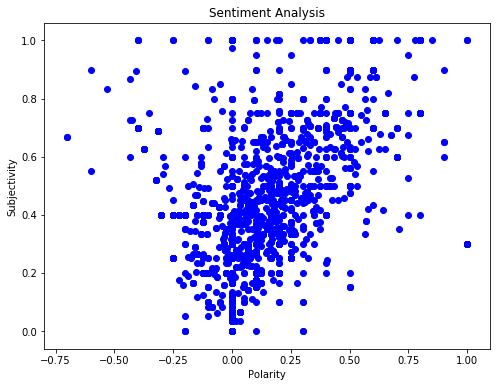

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
for i in range(0, f_tweet.shape[0]):
    plt.scatter(f_tweet['Polarity'][i], f_tweet['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [ ]:
ptweets = f_tweet[f_tweet.Analysis == 'Positive']
ptweets = ptweets['text']

round( (ptweets.shape[0]/f_tweet.shape[0]*100),1)

40.6

In [ ]:
ntweets = f_tweet[f_tweet.Analysis == 'Negative']
ntweets = ntweets['text']

round( (ntweets.shape[0]/f_tweet.shape[0]*100),1)

11.6

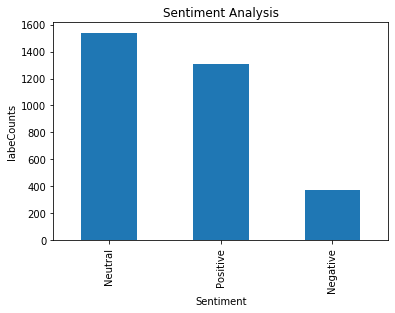

In [ ]:
# plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('labeCounts')
f_tweet['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
2020ftweet = f_tweet[f_tweet['created_at'] > '2020-01-01']
2019ftweet = f_tweet[f_tweet['created_at'] < '2020-01-01']

In [ ]:
pip install wordcloud

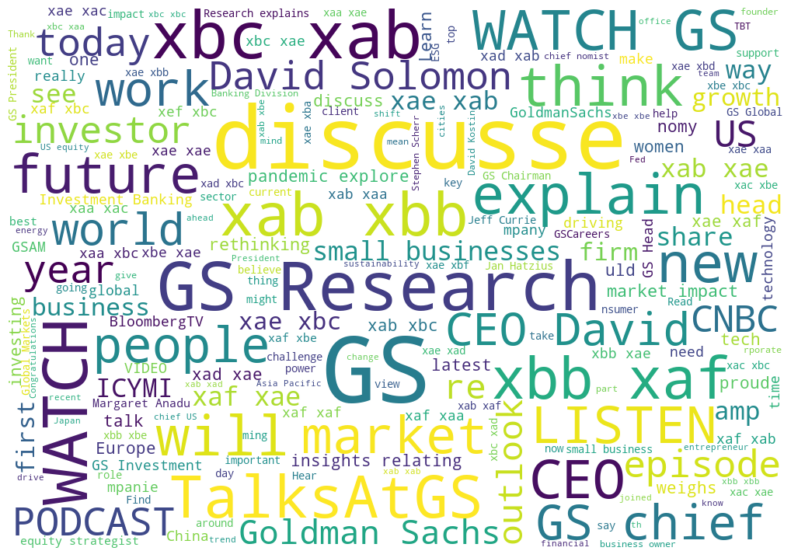

In [ ]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

# Plot the Word Cloud
allwords = ' '.join( [twts for twts in f_tweet['text']])
wordCloud = WordCloud(width = 1000, height = 700, random_state = 21, max_font_size = 119, \
                      background_color = "white").generate(allwords)

plt.figure(figsize = (20,10)) # When you run the code for the first time, you can comment this, 
                                  # second time you can uncomment this to make to plot larger
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

### KEYWORD FREQUENCY OF TWITTER DATA FOR GOLDMAN SACHS

In [ ]:
from collections import Counter
import re
string1 = allwords

In [ ]:
text_file = open("Output.txt", "w")
text_file.write(string1)
text_file.close()

In [ ]:
len(re.findall("big data|Big Data|Big data", string1))

2

In [ ]:
len(re.findall("goldman|gold-man|Goldman|Goldman Sachs|GS", string1)) #GS

1864

In [ ]:
len(re.findall("Information system|information system|Information System|IS", string1)) #IS

101

In [ ]:
len(re.findall("blockchain|Blockchain|block-chain|Block chain|Block-chain|BC", string1)) #BC

110

In [ ]:
len(re.findall("Artificial Intelligence|Artificial-Intelligence|artificial intelligence|Artificial intelligence|AI", string1))

15

In [ ]:
len(re.findall("Machine learning open source|machine learning open source|machine learning|Machine Learning|Open source", string1))

1

In [ ]:
len(re.findall("Digital Banking|Digital banking|digital banking|digital", string1)) #mostlydigital

28

In [ ]:
len(re.findall("Digital Signature|Digital signature|digital signature", string1))

0

In [ ]:
len(re.findall("Neural Network|neural network|Neural network|neural|", string1)) #allneural

361341

In [ ]:
len(re.findall("Crowdsourcing|crowdsourcing", string1))

0

In [ ]:
len(re.findall("data|Data|analytics|Analytics|data analytics|Data analytics|Data Analytics", string1)) #added additional technology term

18